# Руссу Кирилл #
## Лабораторная работа №1 ##
## Вариант 2 ##
### Отмена рейсов ###

In [3]:
import pandas as pd
import numpy
import matplotlib
from scipy import stats
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
Fly_data = pd.read_csv("flights.csv", nrows=500000)


### 1. Подсчитайте количество отменённых рейсов.###

In [4]:
print(Fly_data.groupby('CANCELLED')['FLIGHT_NUMBER'].count())

CANCELLED
0    483176
1     16824
Name: FLIGHT_NUMBER, dtype: int64


### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.###

In [13]:
Fly_data.loc[[Fly_data['CANCELLED'].idxmax()],'ORIGIN_AIRPORT']

32    ANC
Name: ORIGIN_AIRPORT, dtype: object

### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.###

In [7]:
Fly_data['CANCELLED'].corr(Fly_data['DAY'])

-0.03881559296575863

In [16]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['DAY'])

SpearmanrResult(correlation=-0.043267542936422446, pvalue=9.281465260188726e-206)

Если предположить, что отмена рейсов и дни никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=9.2814652601887258e-206

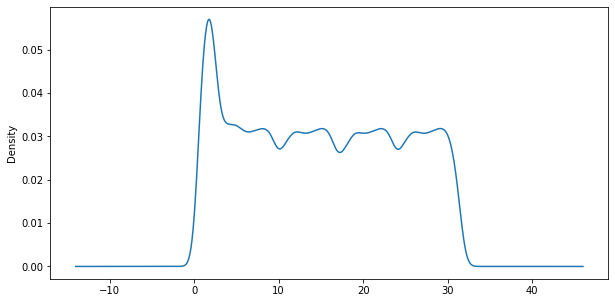

In [9]:
s = pd.Series(Fly_data['DAY'])
s.plot.kde()

In [17]:

Fly_data['CANCELLED'].corr(Fly_data['MONTH'])

0.17885181785805254

In [18]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['MONTH'])

SpearmanrResult(correlation=0.17885181785805146, pvalue=0.0)

Если предположить, что отмена рейсов и месяцы никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.0

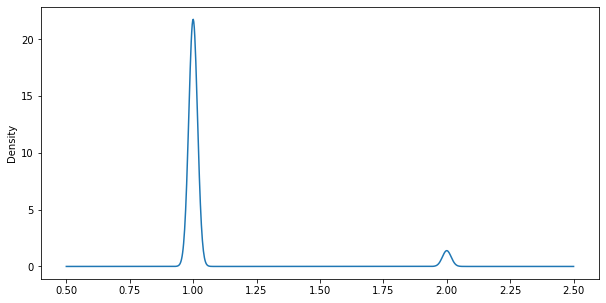

In [19]:
s = pd.Series(Fly_data['MONTH'])
s.plot.kde()

In [11]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['AIRLINE'])

c:\users\vita\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.005471846242923261, pvalue=0.00010919355041078441)

Если предположить, что отмена рейсов и авиакомпании никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.00010919355041078163

In [8]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['ORIGIN_AIRPORT'])

c:\users\vita\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.003705524895201882, pvalue=0.008787712310010467)

Если предположить, что отмена рейсов и аэропорты никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.0087877123100103798

### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.###

#### Для 'US' Airline ####

In [47]:
Fly_data[(Fly_data.AIRLINE == 'US')&
         (Fly_data.CANCELLED == 0)].shape

(34323, 31)

In [48]:
Fly_data[(Fly_data.AIRLINE == 'US')&
         (Fly_data.CANCELLED == 1)].shape

(1268, 31)

In [49]:
Fly_data[(Fly_data.AIRLINE == 'US')&
         (Fly_data.DIVERTED == 1)].shape

(73, 31)

#### Для 'DL' Airline ####

In [50]:
Fly_data[(Fly_data.AIRLINE == 'DL')&
         (Fly_data.CANCELLED == 0)].shape

(67617, 31)

In [52]:
Fly_data[(Fly_data.AIRLINE == 'DL')&
         (Fly_data.CANCELLED == 1)].shape

(938, 31)

In [53]:
Fly_data[(Fly_data.AIRLINE == 'DL')&
         (Fly_data.DIVERTED == 1)].shape

(93, 31)

#### Для 'NK' Airline ####

In [56]:
Fly_data[(Fly_data.AIRLINE == 'NK')&
           (Fly_data.CANCELLED == 0)].shape

(9166, 31)

In [57]:
Fly_data[(Fly_data.AIRLINE == 'NK')&
           (Fly_data.CANCELLED == 1)].shape

(158, 31)

In [58]:
Fly_data[(Fly_data.AIRLINE == 'NK')&
         (Fly_data.DIVERTED == 1)].shape

(15, 31)

### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний. ###

In [80]:
Fly_data['SPEED_FLY'] = Fly_data['DISTANCE'] / (Fly_data['AIR_TIME']/60)
Fly_data['SPEED_FLY']

0         514.082840
1         531.558935
2         517.894737
3         544.651163
4         436.582915
             ...    
499995    507.652174
499996    403.759398
499997           NaN
499998    474.761905
499999    396.000000
Name: SPEED_FLY, Length: 500000, dtype: float64

#### Для 'US' Airline ####

In [79]:
Fly_data.groupby(Fly_data.AIRLINE  == 'US')['SPEED_FLY'].mean()

AIRLINE
False    402.563175
True     407.170196
Name: SPEED_FLY, dtype: float64

#### Для 'DL' Airline ####

In [72]:
Fly_data.groupby(Fly_data.AIRLINE  =='DL')['SPEED_FLY'].mean()

AIRLINE
False    400.616678
True     416.849472
Name: SPEED_FLY, dtype: float64

#### Для 'NK' Airline #### 

In [77]:
Fly_data.groupby(Fly_data.AIRLINE  == 'NK')['SPEED_FLY'].mean()

AIRLINE
False    402.275495
True     434.672737
Name: SPEED_FLY, dtype: float64

### 6. Визуализируйте  карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).###

#### Для 'LAX' ORIGIN_AIRPORT ####

In [27]:
Fly_data[(Fly_data.ORIGIN_AIRPORT == 'LAX')&
         (Fly_data.CANCELLED == 1)].shape

(316, 32)

In [28]:
cancelled_Fly_data = Fly_data[['DAY']+['CANCELLED']+['ORIGIN_AIRPORT']]

In [29]:
cancelled_Fly_data.head(3)

,DAY,CANCELLED,ORIGIN_AIRPORT
0,1,0,ANC
1,1,0,LAX
2,1,0,SFO


In [30]:
f5 = cancelled_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX') & (Fly_data['CANCELLED'] == 1)]

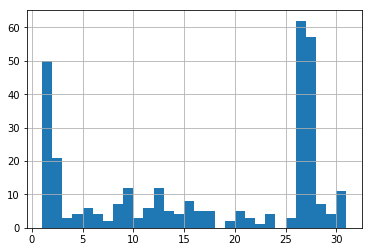

In [31]:
f5.DAY.hist(bins=30)

#### Для 'SEA' ORIGIN_AIRPORT ####

In [32]:
Fly_data[(Fly_data.ORIGIN_AIRPORT == 'SEA')&
         (Fly_data.CANCELLED == 1)].shape

(74, 32)

In [33]:
f6 = cancelled_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA') & (Fly_data['CANCELLED'] == 1)]

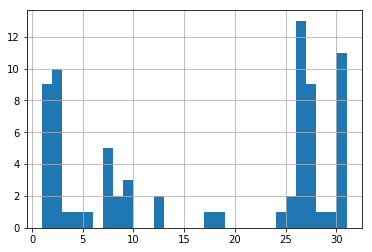

In [34]:
f6.DAY.hist(bins=30)

### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.###

#### Время задержки отправки рейсов ####

In [35]:
delay_Fly_data = Fly_data[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]

In [36]:
f7 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX')]

In [37]:
f7 = f7.dropna()

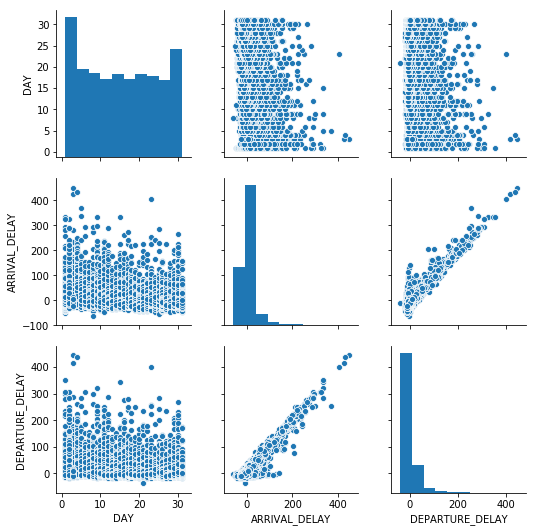

In [38]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f7[cols])

In [39]:
f8 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA')]

In [40]:
f8 = f8.dropna()

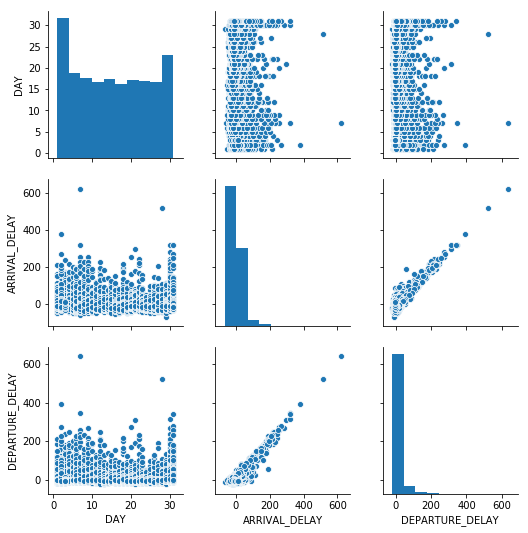

In [41]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f8[cols])

In [42]:
f9 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'ANC')]

In [43]:
f9 = f9.dropna()

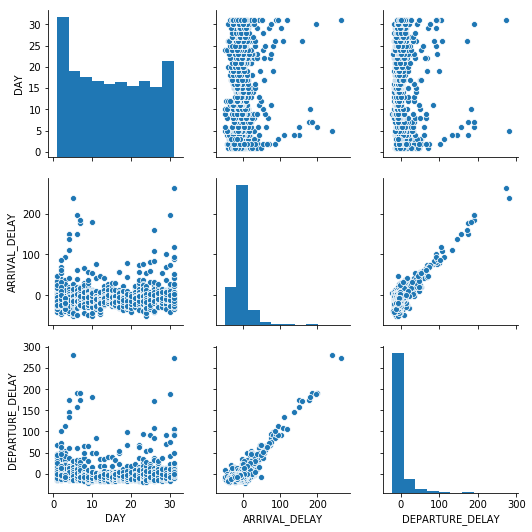

In [44]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f9[cols])

### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине. ###

In [45]:
F_delay_Fly_data = Fly_data[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]

In [46]:
f10 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX')]

In [47]:
f10= f10.dropna()

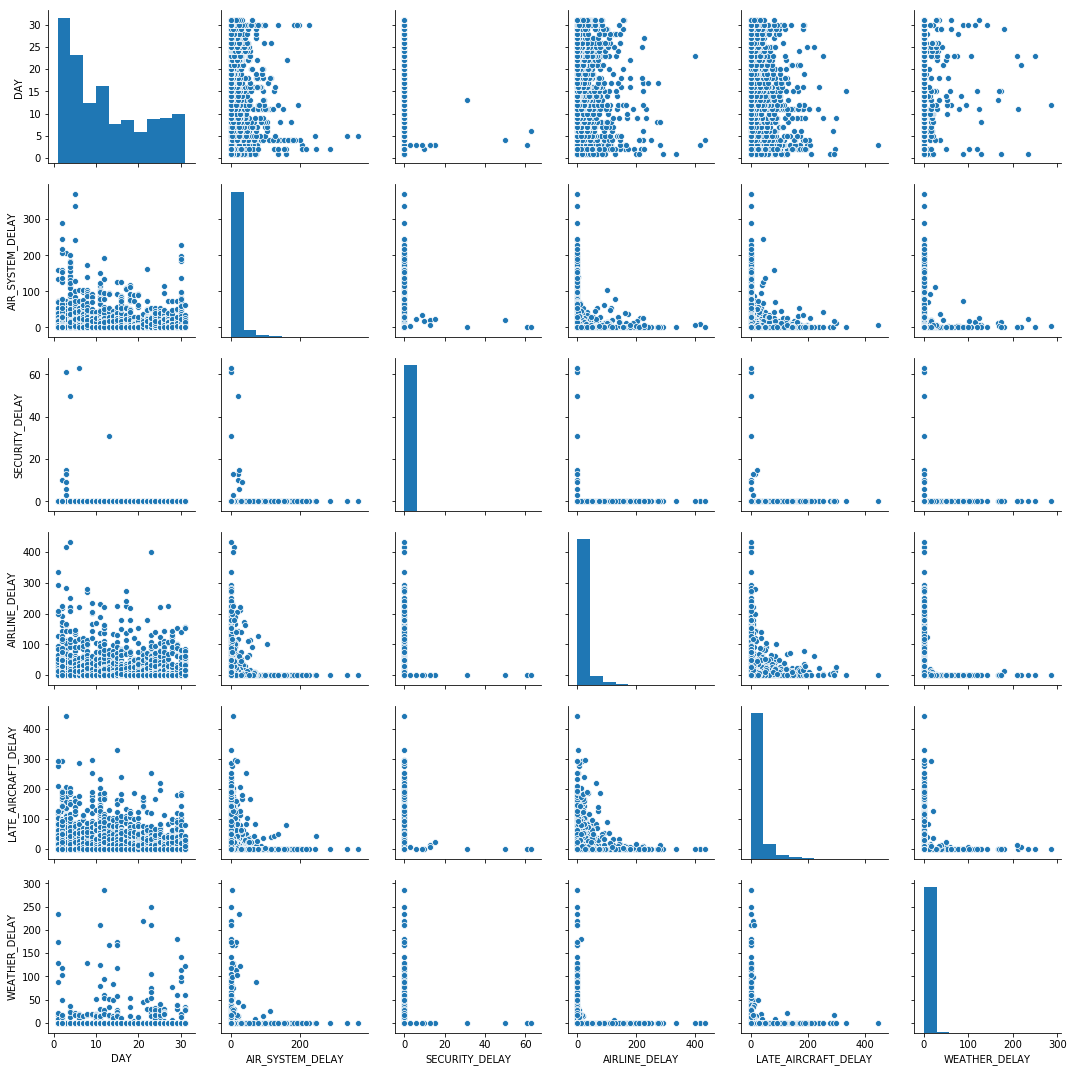

In [48]:
cols = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f10[cols])

In [49]:
f11 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA')]

In [50]:
f11= f11.dropna()

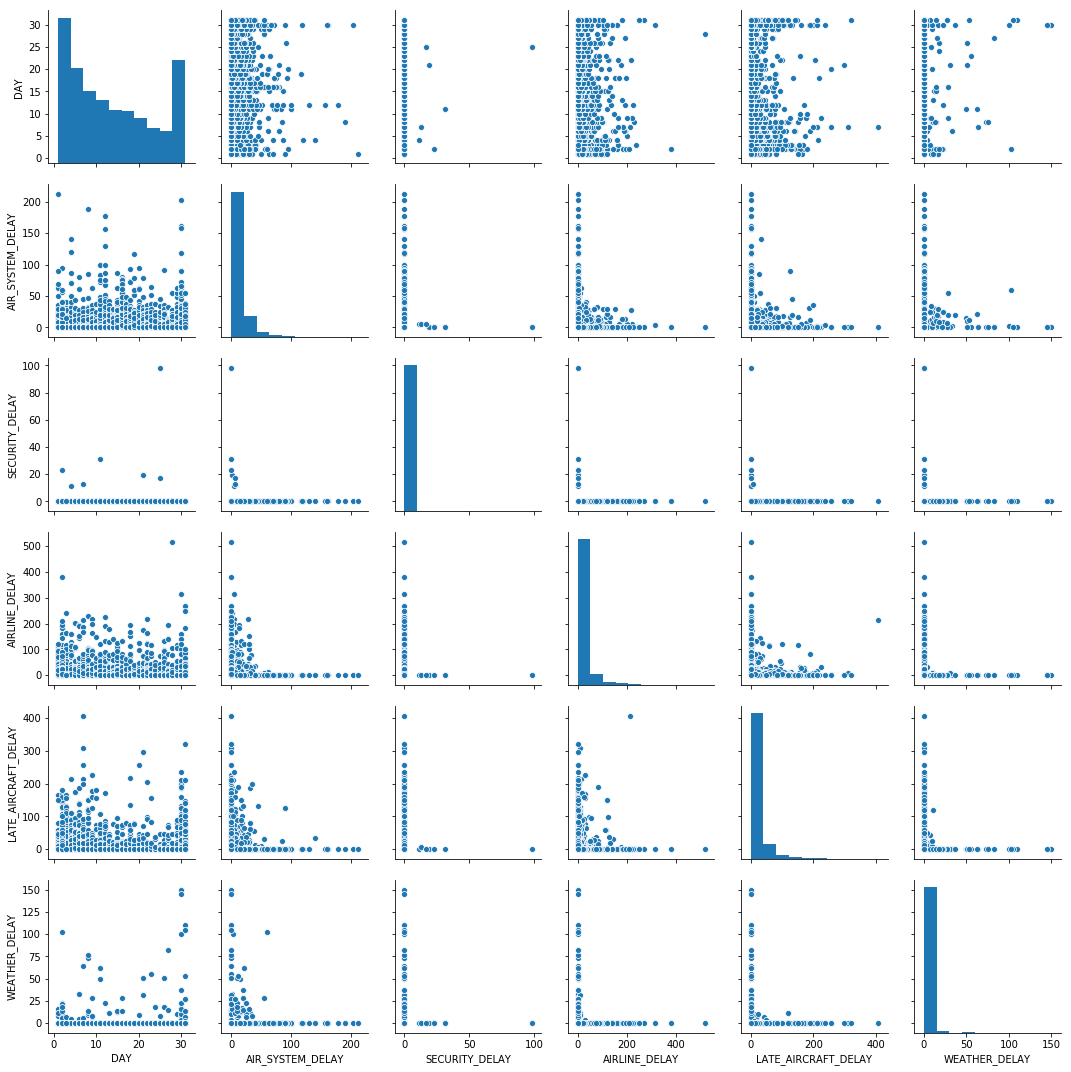

In [51]:
cols_1 = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f11[cols])

In [52]:
f12 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'ANC')]

In [53]:
f12 = f12.dropna()

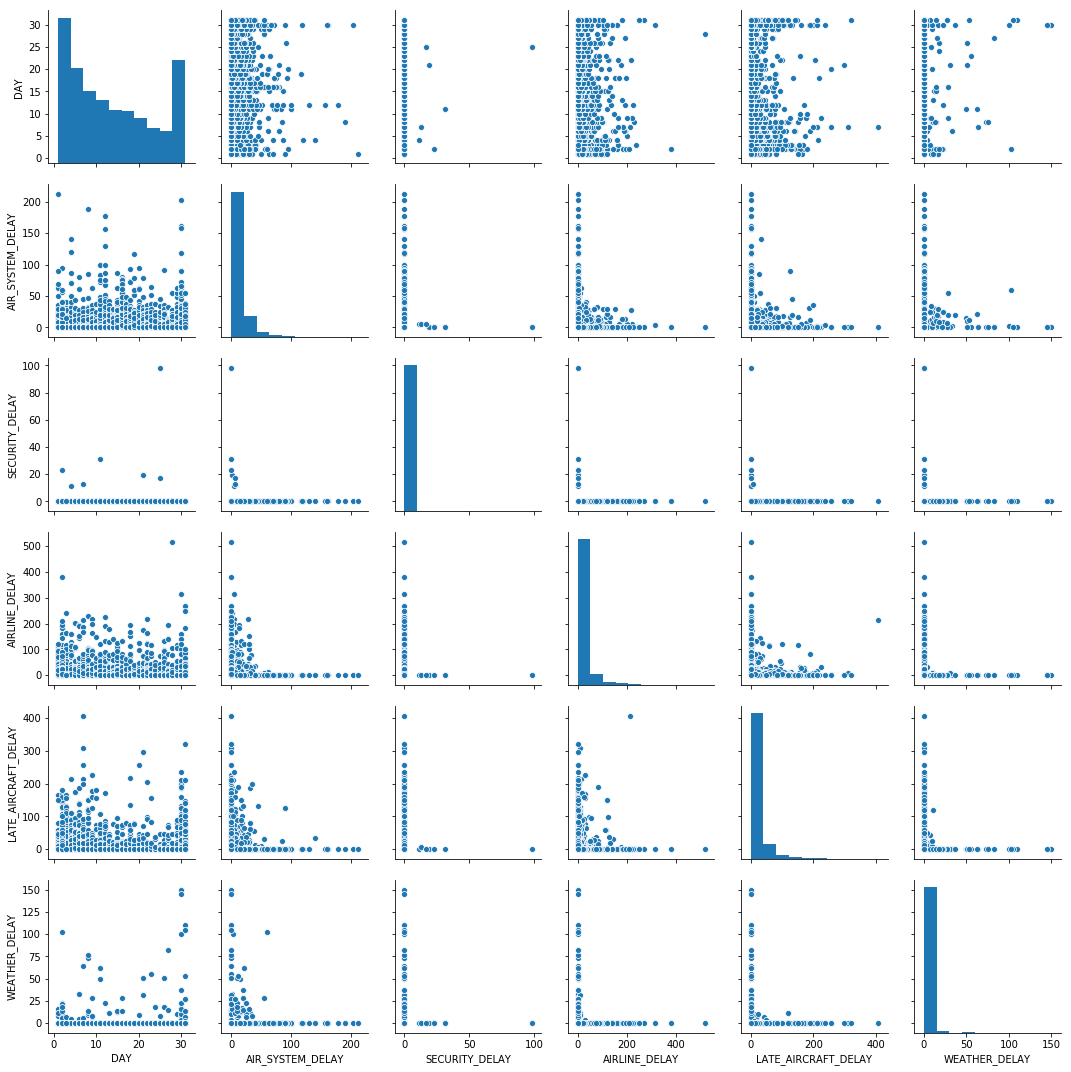

In [54]:
cols_2 = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f11[cols])

### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию. ###

In [11]:
Fly_data['SUM_DELAY'] = Fly_data['ARRIVAL_DELAY'] + Fly_data['DEPARTURE_DELAY']

In [12]:
Sum_1 = Fly_data[['SUM_DELAY']+['AIRLINE']]

In [13]:
Sum_1 = Sum_1.dropna()

In [ ]:
Sum_1.AIRLINE.hist(bins=30)